In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import scipy.io as sio
from datetime import datetime, timedelta

In [69]:
# import data

# IRR for 7MW
IRR_7MW_standard = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v4\IRR_7MW_standard.csv', header = None)
IRR_7MW_standard = np.transpose(IRR_7MW_standard)
IRR_7MW_standard.columns = ['NPV']
Dreal_xaxis = np.linspace(0,20,201)
IRR_7MW_standard["xaxis"] = Dreal_xaxis
#IRR_7MW_standard.head(5)

# NPV for varying capacities
NPV_standard = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v4\NPV_caprange_standard.csv', header = None)
NPV_standard = np.transpose(NPV_standard)
NPV_standard.columns = ['NPV']
capacity_xaxis = np.linspace(0,15,1501)
NPV_standard["xaxis"] = capacity_xaxis
#NPV_standard.head(5)

# IRR for 7MW solar farm
IRR_solarfarm_standard = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar Farm Finance\IRR_solarfarm_standard.csv', header = None)
IRR_solarfarm_standard = np.transpose(IRR_solarfarm_standard)
IRR_solarfarm_standard.columns = ['NPV']
IRR_solarfarm_standard["xaxis"] = Dreal_xaxis
#IRR_solarfarm_standard.head(5)

# Heat flows for PV-T
pvt35flows = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v5\cap35pvtflows.csv', header = None)
pvt7flows = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v5\cap7pvtflows.csv', header = None)
pvt105flows = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v5\cap105pvtflows.csv', header = None)
pvt35flows.columns = ['SH total','DHW total','panel total','net demand','SH excess','DHW excess','ground flows']
pvt7flows.columns = ['SH total','DHW total','panel total','net demand','SH excess','DHW excess','ground flows']
pvt105flows.columns = ['SH total','DHW total','panel total','net demand','SH excess','DHW excess','ground flows']
datetime_daily = np.arange(datetime(2019,1,1), datetime(2020,1,1), timedelta(days=1)).astype(datetime)
pvt35flows["datetime"] = datetime_daily
pvt7flows["datetime"] = datetime_daily
pvt105flows["datetime"] = datetime_daily
pvt7flows.tail(5)

SH total  DHW total  panel total  net demand   SH excess  DHW excess  \
360  108.341699  27.745549        3.150  132.937247  108.341699   24.595549   
361  119.545713  27.765263        4.886  142.424976  119.545713   22.879263   
362  126.392032  27.743768       24.514  129.621800  126.392032    3.229768   
363  112.315275  27.763453       21.000  119.078728  112.315275    6.763453   
364  110.096705  27.824405        2.786  135.135110  110.096705   25.038405   

     ground flows   datetime  
360          -0.0 2019-12-27  
361          -0.0 2019-12-28  
362          -0.0 2019-12-29  
363          -0.0 2019-12-30  
364          -0.0 2019-12-31

In [30]:
# set x axis
# Dreal_xaxis = np.linspace(0,20,200)
# Dreal_xaxis

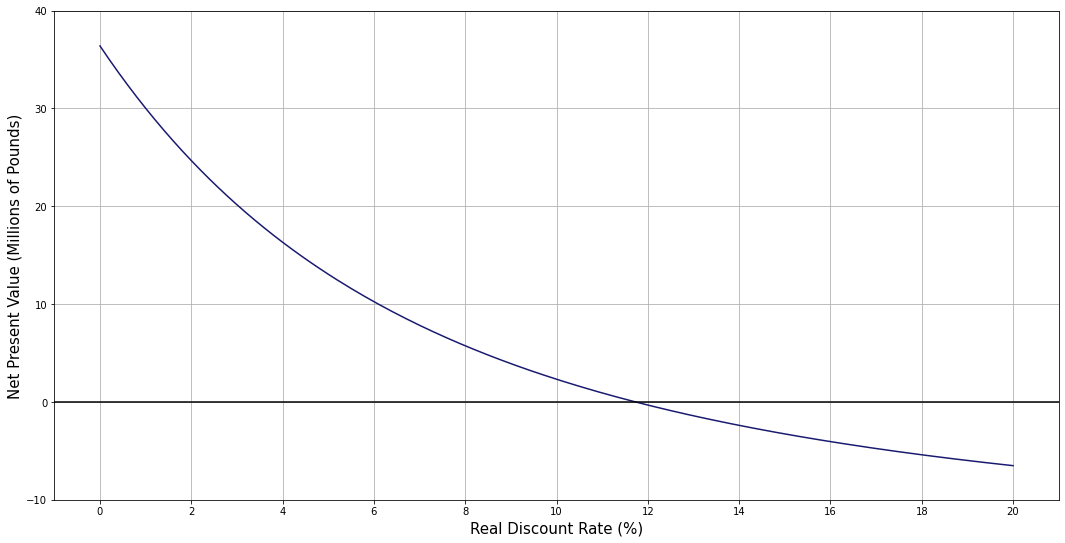

In [46]:
# plot IRR of 7MW in standard parameters
plt.figure(figsize=(18,9))
plt.plot(IRR_7MW_standard["xaxis"],IRR_7MW_standard["NPV"],'midnightblue')
plt.xlabel('Real Discount Rate (%)',fontsize=15)
plt.ylabel('Net Present Value (Millions of Pounds)',fontsize=15)
plt.axhline(y=0, c='k')
plt.xticks(np.arange(0, 21, 2.0))
plt.yticks(np.arange(-10, 45, 10.0))
plt.grid()
plt.show()

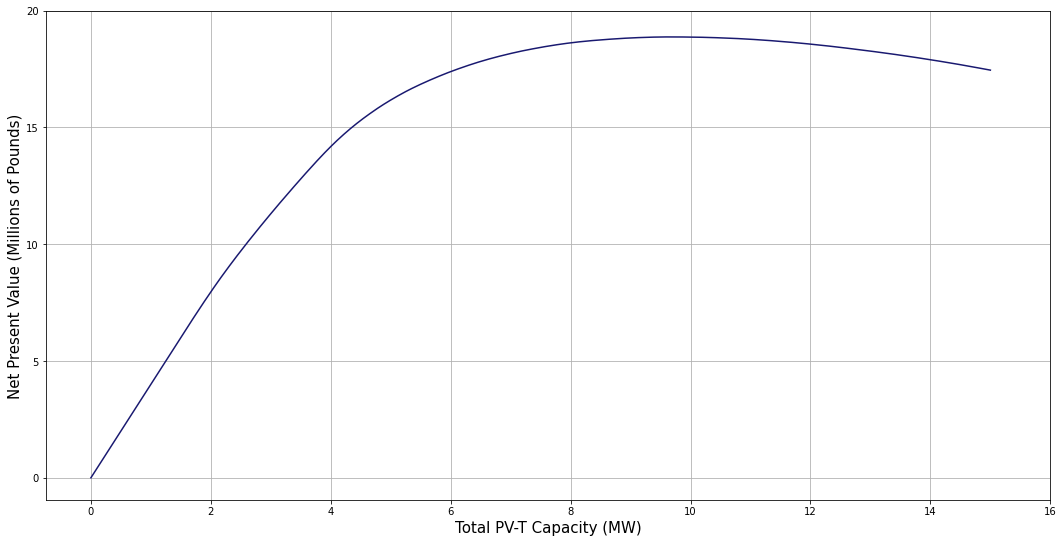

In [52]:
# plot NPV for varying capacities

plt.figure(figsize=(18,9))
plt.plot(NPV_standard["xaxis"],NPV_standard["NPV"],'midnightblue')
plt.xlabel('Total PV-T Capacity (MW)',fontsize=15)
plt.ylabel('Net Present Value (Millions of Pounds)',fontsize=15)
plt.xticks(np.arange(0, 17, 2.0))
plt.yticks(np.arange(0, 21, 5.0))
plt.grid()
plt.show()

In [14]:
# show IRR for 6MW solar farm

plt.figure(figsize=(18,9))
plt.plot(IRR_solarfarm_standard["xaxis"],IRR_solarfarm_standard["NPV"],'midnightblue')
plt.xlabel('Real Discount Rate (%)',fontsize=15)
plt.ylabel('Net Present Value (Millions of Pounds)',fontsize=15)
plt.axhline(y=0, c='k')
plt.xticks(np.arange(0, 21, 2.0))
#plt.yticks(np.arange(-2, 7, 1.0))
plt.grid()
plt.show()

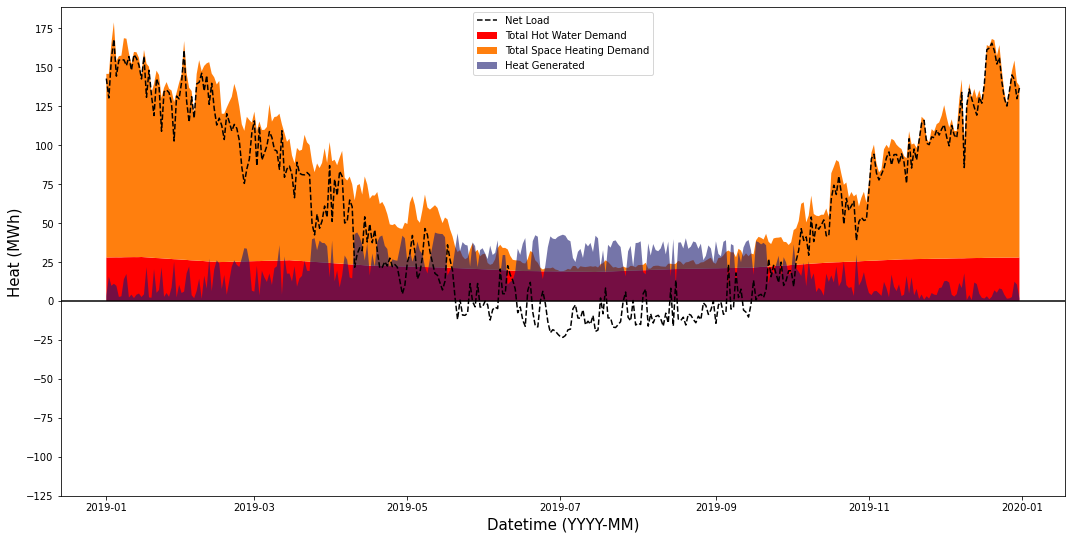

In [82]:
# plot 3.5MW capacity graphs


# net flow graph
plt.figure(figsize=(18,9))
plt.stackplot(pvt35flows["datetime"], pvt35flows["DHW total"], pvt35flows["SH total"], colors =['red', 'tab:orange'], labels = ['Total Hot Water Demand', 'Total Space Heating Demand'])

#plt.stackplot(pvt35flows["datetime"], pvt35flows["panel total"]*(-1), colors =['deeppink'], labels = ['Heat Generated'])
plt.stackplot(pvt35flows["datetime"], pvt35flows["panel total"], colors =['midnightblue'], labels = ['Heat Generated'], alpha=0.6)

plt.plot(pvt35flows["datetime"], pvt35flows["net demand"] - pvt35flows["ground flows"],'--k', label = 'Net Load')
plt.legend(loc=9)
plt.xlabel('Datetime (YYYY-MM)',fontsize=15)
plt.ylabel('Heat (MWh)',fontsize=15)
plt.yticks(np.arange(-125, 200, 25.0))
plt.axhline(y=0, c='k')


# excess demand graph
plt.figure(figsize=(18,9))
plt.stackplot(pvt35flows["datetime"], pvt35flows["DHW excess"], pvt35flows["SH excess"], colors =['red', 'tab:orange'], labels = ['Excess Hot Water Demand', 'Excess Space Heating Demand'])
plt.stackplot(pvt35flows["datetime"], pvt35flows["ground flows"]*(-1), colors =['deeppink'], labels = ['Heat Flow into Ground'])
#plt.plot(pvt35flows["datetime"], pvt35flows["DHW total"] + pvt35flows["SH total"], '--k', label = 'Total Heat Demand')
#plt.plot(pvt35flows["datetime"], pvt35flows["DHW total"],'-.k', label = 'Total DHW Demand')
plt.legend(loc=9)
plt.xlabel('Datetime (YYYY-MM)',fontsize=15)
plt.ylabel('Heat (MWh)',fontsize=15)
plt.yticks(np.arange(-125, 200, 25.0))
plt.axhline(y=0, c='k')


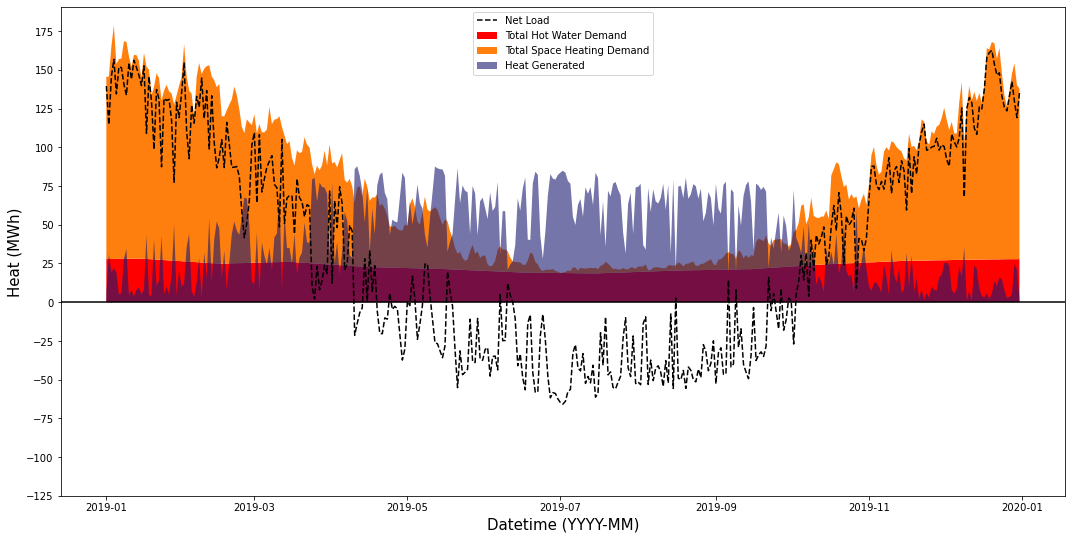

In [83]:
# plot 7MW capacity graphs


# net flow graph
plt.figure(figsize=(18,9))
plt.stackplot(pvt35flows["datetime"], pvt7flows["DHW total"], pvt7flows["SH total"], colors =['red', 'tab:orange'], labels = ['Total Hot Water Demand', 'Total Space Heating Demand'])

#plt.stackplot(pvt7flows["datetime"], pvt7flows["panel total"]*(-1), colors =['deeppink'], labels = ['Heat Generated'])
plt.stackplot(pvt35flows["datetime"], pvt7flows["panel total"], colors =['midnightblue'], labels = ['Heat Generated'], alpha=0.6)

plt.plot(pvt7flows["datetime"], pvt7flows["net demand"] - pvt7flows["ground flows"],'--k', label = 'Net Load')
plt.legend(loc=9)
plt.xlabel('Datetime (YYYY-MM)',fontsize=15)
plt.ylabel('Heat (MWh)',fontsize=15)
plt.yticks(np.arange(-125, 200, 25.0))
plt.axhline(y=0, c='k')


# excess demand graph
plt.figure(figsize=(18,9))
plt.stackplot(pvt7flows["datetime"], pvt7flows["DHW excess"], pvt7flows["SH excess"], colors =['red', 'tab:orange'], labels = ['Excess Hot Water Demand', 'Excess Space Heating Demand'])
plt.stackplot(pvt7flows["datetime"], pvt7flows["ground flows"]*(-1), colors =['deeppink'], labels = ['Heat Flow into Ground'])
#plt.plot(pvt7flows["datetime"], pvt7flows["DHW total"] + pvt7flows["SH total"], '--k', label = 'Total Heat Demand')
#plt.plot(pvt7flows["datetime"], pvt7flows["DHW total"],'-.k', label = 'Total DHW Demand')
plt.legend(loc=9)
plt.xlabel('Datetime (YYYY-MM)',fontsize=15)
plt.ylabel('Heat (MWh)',fontsize=15)
plt.yticks(np.arange(-125, 200, 25.0))
plt.axhline(y=0, c='k')


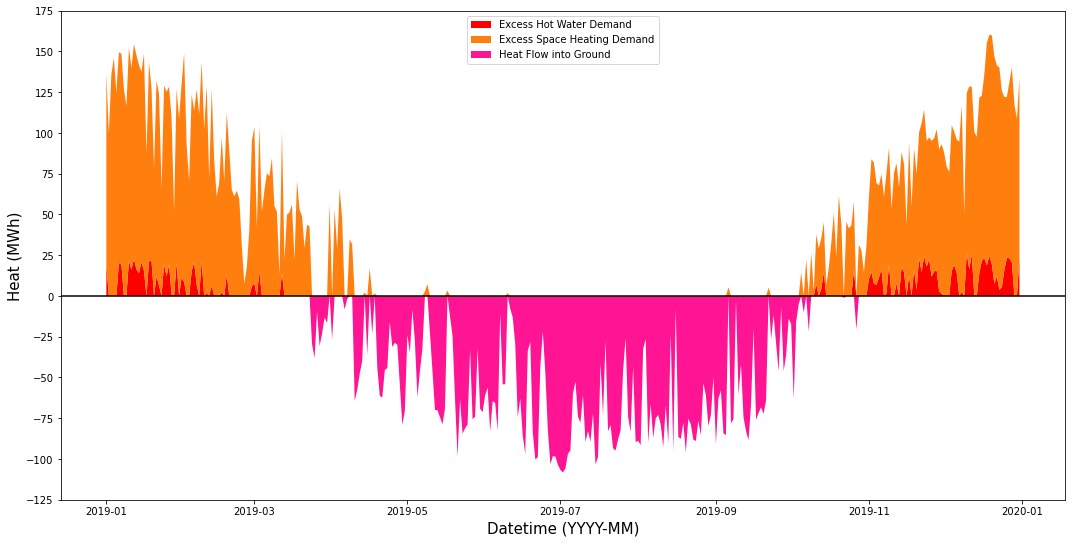

In [84]:
# plot 10.5MW capacity graphs


# net flow graph
plt.figure(figsize=(18,9))
plt.stackplot(pvt35flows["datetime"], pvt105flows["DHW total"], pvt105flows["SH total"], colors =['red', 'tab:orange'], labels = ['Total Hot Water Demand', 'Total Space Heating Demand'])

#plt.stackplot(pvt7flows["datetime"], pvt7flows["panel total"]*(-1), colors =['deeppink'], labels = ['Heat Generated'])
plt.stackplot(pvt35flows["datetime"], pvt105flows["panel total"], colors =['midnightblue'], labels = ['Heat Generated'], alpha=0.6)

plt.plot(pvt105flows["datetime"], pvt105flows["net demand"] - pvt105flows["ground flows"],'--k', label = 'Net Load')
plt.legend(loc=9)
plt.xlabel('Datetime (YYYY-MM)',fontsize=15)
plt.ylabel('Heat (MWh)',fontsize=15)
plt.yticks(np.arange(-125, 200, 25.0))
plt.axhline(y=0, c='k')


# excess demand graph
plt.figure(figsize=(18,9))
plt.stackplot(pvt105flows["datetime"], pvt105flows["DHW excess"], pvt105flows["SH excess"], colors =['red', 'tab:orange'], labels = ['Excess Hot Water Demand', 'Excess Space Heating Demand'])
plt.stackplot(pvt105flows["datetime"], pvt105flows["ground flows"]*(-1), colors =['deeppink'], labels = ['Heat Flow into Ground'])
#plt.plot(pvt7flows["datetime"], pvt7flows["DHW total"] + pvt7flows["SH total"], '--k', label = 'Total Heat Demand')
#plt.plot(pvt7flows["datetime"], pvt7flows["DHW total"],'-.k', label = 'Total DHW Demand')
plt.legend(loc=9)
plt.xlabel('Datetime (YYYY-MM)',fontsize=15)
plt.ylabel('Heat (MWh)',fontsize=15)
plt.yticks(np.arange(-125, 200, 25.0))
plt.axhline(y=0, c='k')